# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


Dataset : Heart Disease Dataset
(Comprehensive)

Link Dataset : https://www.kaggle.com/datasets/sid321axn/heart-statlog-cleveland-hungary-final

Dataset ini merupakan dataset yang digunakan untuk memprediksi penyakit jantung. Dataset ini diambil dari kaggle dan memiliki 1190 data.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [24]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
#Load Dataset
df = pd.read_csv("heart.csv")

In [3]:
#Menampilkan 5 data awal
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [4]:
#Informasi Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [5]:
#Ukuran Dataset
df.shape

(1190, 12)

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [10]:
#Pengecekan Missing Value
df.isnull().sum()

,0
age,0
sex,0
chest pain type,0
resting bp s,0
cholesterol,0
fasting blood sugar,0
resting ecg,0
max heart rate,0
exercise angina,0
oldpeak,0


In [11]:
#Statistik Deskriptif
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


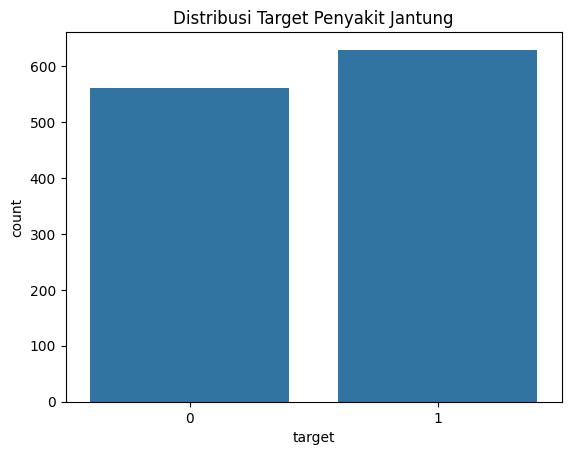

In [12]:
#Distribusi Target
sns.countplot(x="target", data=df)
plt.title("Distribusi Target Penyakit Jantung")
plt.show()

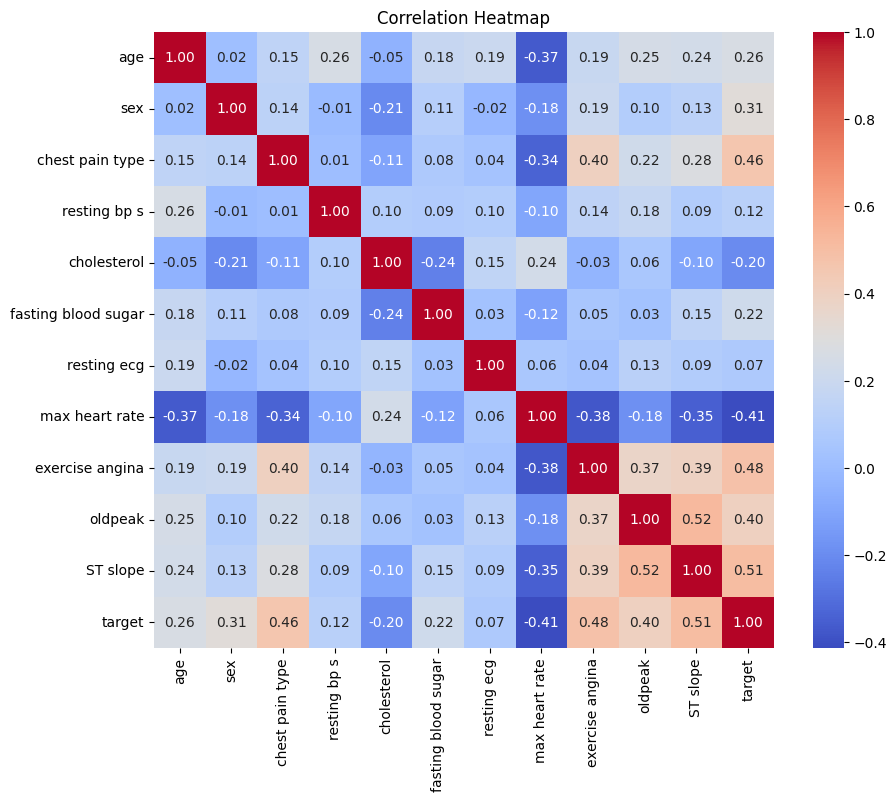

In [13]:
#Korelasi Fitur Numerik
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

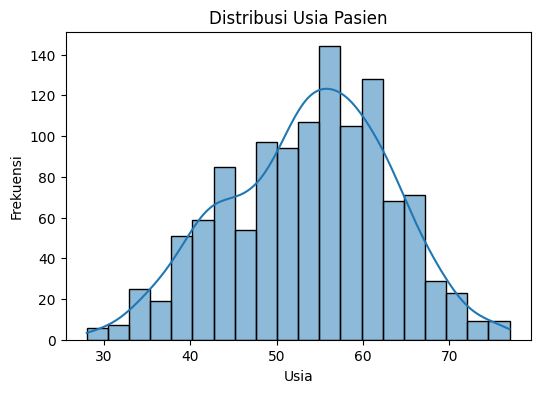

In [14]:
#Visualisasi

#A. Distribusi Usia
plt.figure(figsize=(6,4))
sns.histplot(df["age"], bins=20, kde=True)
plt.title("Distribusi Usia Pasien")
plt.xlabel("Usia")
plt.ylabel("Frekuensi")
plt.show()

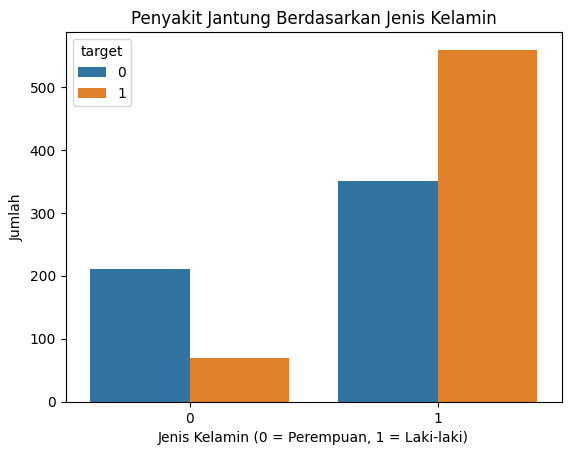

In [15]:
#B. Penyakit Jantung Berdasarkan Jenis Kelamin
sns.countplot(x="sex", hue="target", data=df)
plt.title("Penyakit Jantung Berdasarkan Jenis Kelamin")
plt.xlabel("Jenis Kelamin (0 = Perempuan, 1 = Laki-laki)")
plt.ylabel("Jumlah")
plt.show()

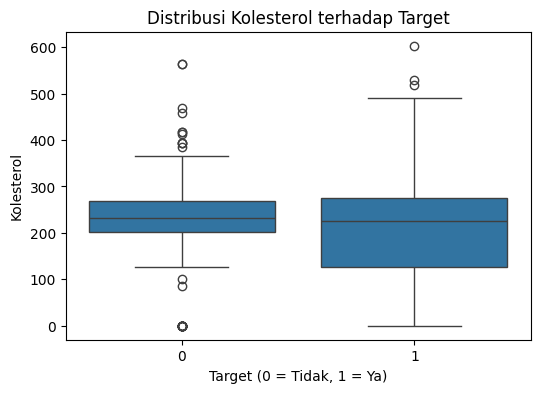

In [17]:
#Hubungan Kolesterol dengan Target
plt.figure(figsize=(6,4))
sns.boxplot(x="target", y="cholesterol", data=df)
plt.title("Distribusi Kolesterol terhadap Target")
plt.xlabel("Target (0 = Tidak, 1 = Ya)")
plt.ylabel("Kolesterol")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [29]:
#Cek Nama Kolom Dataset
df.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [30]:
#Merapikan Nama Kolom
df.columns = (
    df.columns
    .str.lower()
    .str.replace(' ', '_')
)

In [31]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_bp_s', 'cholesterol',
       'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
       'exercise_angina', 'oldpeak', 'st_slope', 'target'],
      dtype='object')

In [32]:
#Mengecek Missing Values
df.isnull().sum()

,0
age,0
sex,0
chest_pain_type,0
resting_bp_s,0
cholesterol,0
fasting_blood_sugar,0
resting_ecg,0
max_heart_rate,0
exercise_angina,0
oldpeak,0


In [33]:
#Menghapus Data Duplikat
print("Sebelum:", df.shape)
df = df.drop_duplicates()
print("Sesudah:", df.shape)

Sebelum: (918, 12)
Sesudah: (918, 12)


In [34]:
#Memisahkan Fitur dan Target
X = df.drop('target', axis=1)
y = df['target']

In [36]:
#Menentukan Fitur Kategorikal dan Numerik

categorical_features = [
    'sex',
    'chest_pain_type',
    'fasting_blood_sugar',
    'resting_ecg',
    'exercise_angina',
    'st_slope'
]

numeric_features = [col for col in X.columns if col not in categorical_features]

In [37]:
#Encoding Data Kategorikal
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [38]:
#Split Data (Train dan Test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [39]:
#Normalisasi
preprocessing_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('scaler', StandardScaler(with_mean=False))
    ]
)

X_train_processed = preprocessing_pipeline.fit_transform(X_train)
X_test_processed = preprocessing_pipeline.transform(X_test)

In [41]:
#Menyimpan Data Preprocessing
X_train_df = pd.DataFrame(
    X_train_processed,
    columns=feature_names
)

X_train_df['target'] = y_train.values
X_train_df.to_csv("heart_preprocessing.csv", index=False)